In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Importing 'demographics.txt' data set for the case study

demographics = pd.read_csv('E:\BA\Capstone Project\demographics.txt', sep="\t")
demographics

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP
...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,IND


In [3]:
# Importing 'behaviour.JSON' data

# Define the file path
file_path_behaviour = 'E:\BA\Capstone Project\\behaviour.JSON'
file_path_campaign = 'E:\BA\Capstone Project\campaign.JSON'

# Open and read the behaviour.JSON file
with open(file_path_behaviour, 'r', encoding='utf-8') as file:
    behaviour_json = json.load(file)

# Normalize JSON data to a DataFrame
# Since the JSON data has keys for each ID, we need to flatten it correctly
data = []
for entry in behaviour_json:
    for key, value in entry.items():
        value['ID'] = key
        data.append(value)

behaviour = pd.DataFrame(data)

In [4]:
behaviour

,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,ID
0,0,189,104,379,111,189,218,1,4,4,6,1,ID_1826
1,0,464,5,64,7,0,37,1,7,3,7,5,ID_1
2,0,134,11,59,15,2,30,1,3,2,5,2,ID_10476
3,0,10,0,1,0,0,0,1,1,0,2,7,ID_1386
4,0,6,16,24,11,0,34,2,3,1,2,7,ID_5371
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,99,372,18,126,47,48,78,2,5,2,11,4,ID_10142
2236,99,5,10,13,3,8,16,1,1,0,3,8,ID_5263
2237,99,185,2,88,15,5,14,2,6,1,5,8,ID_22
2238,99,267,38,701,149,165,63,1,5,4,10,3,ID_528


In [5]:
# Importing 'campaign.JSON' data

# Define the file path
file_path_campaign = 'E:\BA\Capstone Project\campaign.JSON'

# Open and read the campaign.JSON file
with open(file_path_campaign, 'r', encoding='utf-8') as file:
    campaign_json = json.load(file)

# Normalize JSON data to a DataFrame
# Since the JSON data has keys for each ID, we need to flatten it correctly
data = []
for entry in campaign_json:
    for key, value in entry.items():
        value['ID'] = key
        data.append(value)

campaign = pd.DataFrame(data)

In [6]:
campaign

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,ID
0,0,0,0,0,0,1,0,ID_1826
1,0,1,0,0,0,1,0,ID_1
2,0,0,0,0,0,0,0,ID_10476
3,0,0,0,0,0,0,0,ID_1386
4,0,0,1,0,0,1,0,ID_5371
...,...,...,...,...,...,...,...,...
2235,0,0,0,0,0,0,0,ID_10142
2236,0,0,0,0,0,0,0,ID_5263
2237,0,0,0,0,0,0,0,ID_22
2238,0,0,0,0,0,0,0,ID_528


In [7]:
# Checkin the shape of each file

print("Shape of Demographics:", demographics.shape)
print("Shape of Behaviour:", behaviour.shape)
print("Shape of Campaign:", campaign.shape)

Shape of Demographics: (2240, 9)
Shape of Behaviour: (2240, 13)
Shape of Campaign: (2240, 8)


# Data Quality and Check (Task 1)
1. Creating a consolidated view of data by joining the data present in Demography, behaviour, campaign

In [8]:
# Convert IDs in behaviour and campaign to match demography IDs
behaviour['ID'] = behaviour['ID'].apply(lambda x: int(x.split('_')[1]))
campaign['ID'] = campaign['ID'].apply(lambda x: int(x.split('_')[1]))

In [9]:
# Merge the DataFrames

sale = demographics.merge(behaviour, on='ID').merge(campaign, on='ID')

In [10]:
sale

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,US,99,...,2,11,4,0,0,0,0,0,0,0
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,SP,99,...,0,3,8,0,0,0,0,0,0,0
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,SP,99,...,1,5,8,0,0,0,0,0,0,0
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,IND,99,...,4,10,3,0,0,0,0,0,0,0


2. Are there any variables where you will need to clean the raw data, what kind of cleaning will be needed?

In [11]:
# Checking shape of the data.
sale.shape

(2240, 28)

In [12]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Country              2240 non-null   object
 9   Recency              2240 non-null   int64 
 10  MntWines             2240 non-null   int64 
 11  MntFruits            2240 non-null   int64 
 12  MntMeatProducts      2240 non-null   int64 
 13  MntFishProducts      2240 non-null   int64 
 14  MntSweetProducts     2240 non-null   int64 
 15  MntGoldProds         2240 non-null   int64 
 16  NumDea

In [13]:
sale.columns = sale.columns.str.strip()

In [14]:
# Convert 'Income' to numeric
sale['Income'] = sale['Income'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Dt_Customer' to datetime
sale['Dt_Customer'] = pd.to_datetime(sale['Dt_Customer'])

In [15]:
# Identifying the missing values

missing_values = sale.isnull().sum()
print("Missing values before cleaning:\n", missing_values)

Missing values before cleaning:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Country                 0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Response                0
Complain                0
dtype: int64


In [16]:
# Handling the missing value in Income with mean 

# 1. Calculate the mean of the 'Income' column
mean_income = sale['Income'].mean()
print(f"Mean of Income: {mean_income}")

# 2. Fill missing values in the 'Income' column with the mean
sale['Income'] = sale['Income'].fillna(mean_income)

# Display missing values after filling
print("Missing values after filling:\n", sale.isnull().sum())

Mean of Income: 52247.25135379061
Missing values after filling:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Country                0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
AcceptedCmp2           0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
Response               0
Complain               0
dtype: int64


In [17]:
# Adding 'Age' column considering the current_year to be 2024

current_year = 2024
sale['Age'] = current_year - sale['Year_Birth']
sale

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,SP,0,...,6,1,0,0,0,0,0,1,0,54
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,CA,0,...,7,5,0,1,0,0,0,1,0,63
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,US,0,...,5,2,0,0,0,0,0,0,0,66
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,AUS,0,...,2,7,0,0,0,0,0,0,0,57
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,SP,0,...,2,7,0,0,1,0,0,1,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,US,99,...,11,4,0,0,0,0,0,0,0,48
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,SP,99,...,3,8,0,0,0,0,0,0,0,47
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,SP,99,...,5,8,0,0,0,0,0,0,0,48
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,IND,99,...,10,3,0,0,0,0,0,0,0,46


3. Create a data quality report after doing the necessary cleaning and joining of the files by:<br>
<br>
(a) Doing univariates for continuous variables (compute: percentage of missing values, percentage of terms which are zero, mean, 25th, 50th, 75th, 90th and 95th percentile, min and max)

In [18]:
# List of continuous variables
continuous_vars = [
    'Income', 'Age', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
]

# Initialize an empty dictionary to store results
data_quality_report = {}

# Calculate statistics for each continuous variable
for var in continuous_vars:
    data_quality_report[var] = {
        'Missing Values (%)': sale[var].isnull().mean() * 100,
        'Zero Values (%)': (sale[var] == 0).mean() * 100,
        'Mean': sale[var].mean(),
        '25th Percentile': sale[var].quantile(0.25),
        '50th Percentile (Median)': sale[var].median(),
        '75th Percentile': sale[var].quantile(0.75),
        '90th Percentile': sale[var].quantile(0.90),
        '95th Percentile': sale[var].quantile(0.95),
        'Min': sale[var].min(),
        'Max': sale[var].max()
    }

# Convert the dictionary to a DataFrame
data_quality_report_df = pd.DataFrame(data_quality_report).transpose()

# Display the data quality report
print(data_quality_report_df)

                     Missing Values (%)  Zero Values (%)          Mean  \
Income                              0.0         0.000000  52247.251354   
Age                                 0.0         0.000000     55.194196   
Recency                             0.0         1.250000     49.109375   
MntWines                            0.0         0.580357    303.935714   
MntFruits                           0.0        17.857143     26.302232   
MntMeatProducts                     0.0         0.044643    166.950000   
MntFishProducts                     0.0        17.142857     37.525446   
MntSweetProducts                    0.0        18.705357     27.062946   
MntGoldProds                        0.0         2.723214     44.021875   
NumDealsPurchases                   0.0         2.053571      2.325000   
NumWebPurchases                     0.0         2.187500      4.084821   
NumCatalogPurchases                 0.0        26.160714      2.662054   
NumStorePurchases                   0.

3. Create a data quality report after doing the necessary cleaning and joining of the files by:<br>
(b) Doing univariates for categorical variables (compute:percentage of missing values, number of unique values)

In [19]:
# List of categorical variables
categorical_vars = [
    'ID', 'Education', 'Marital_Status', 'Dt_Customer', 'Country', 'AcceptedCmp1',
    'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain'
]

# Initialize an empty dictionary to store results
data_quality_report_categorical = {}

# Calculate statistics for each categorical variable
for var in categorical_vars:
    data_quality_report_categorical[var] = {
        'Missing Values (%)': sale[var].isnull().mean() * 100,
        'Unique Values': sale[var].nunique()
    }

# Convert the dictionary to a DataFrame
data_quality_report_categorical_df = pd.DataFrame(data_quality_report_categorical).transpose()

# Display the data quality report for categorical variables
print(data_quality_report_categorical_df)

                Missing Values (%)  Unique Values
ID                             0.0         2240.0
Education                      0.0            5.0
Marital_Status                 0.0            8.0
Dt_Customer                    0.0          663.0
Country                        0.0            8.0
AcceptedCmp1                   0.0            2.0
AcceptedCmp2                   0.0            2.0
AcceptedCmp3                   0.0            2.0
AcceptedCmp4                   0.0            2.0
AcceptedCmp5                   0.0            2.0
Response                       0.0            2.0
Complain                       0.0            2.0


4. Are there any extreme values of variables representing income, amount of money spent on various categories, recency of purchase?

In [20]:
# List of variables to check for extreme values
variables_of_interest = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# Function to identify outliers using IQR method
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify and print outliers for each variable of interest
for var in variables_of_interest:
    outliers = find_outliers(sale, var)
    print(f"Outliers for {var}:")
    print(outliers)
    print()

Outliers for Income:
         ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
325    4931        1977  Graduation       Together  157146.0        0   
497    1501        1982         PhD        Married  160803.0        0   
527    9432        1977  Graduation       Together  666666.0        1   
731    1503        1976         PhD       Together  162397.0        1   
853    5336        1971      Master       Together  157733.0        1   
1826   5555        1975  Graduation       Divorced  153924.0        0   
1925  11181        1949         PhD        Married  156924.0        0   
2204   8475        1973         PhD        Married  157243.0        0   

      Teenhome Dt_Customer Country  Recency  ...  NumStorePurchases  \
325          0  2013-04-29      SA       13  ...                  0   
497          0  2012-08-04      US       21  ...                  1   
527          0  2013-06-02      SA       23  ...                  3   
731          1  2013-06-03      SP   

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
5      7348        1958         PhD         Single  71691.0        0   
12    10530        1959         PhD          Widow  67786.0        0   
29     9687        1975  Graduation         Single  73170.0        0   
45     9595        1961  Graduation       Together  64260.0        0   
...     ...         ...         ...            ...      ...      ...   
2190   8602        1964  Graduation       Divorced  69932.0        0   
2197   9940        1958  Graduation       Together  64961.0        0   
2215   9645        1968  Graduation        Married  64590.0        0   
2218   4974        1970  Graduation         Single  83273.0        1   
2226   1743        1974  Graduation         Single  69719.0        0   

      Teenhome Dt_Customer Country  Recency  ...  NumStorePurchases  \
0            0  2014-06-16      SP        0  ...                

Outliers for MntSweetProducts:
        ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0     1826        1970  Graduation       Divorced  84835.0        0         0   
10    2079        1947    2n Cycle        Married  81044.0        0         0   
31    9264        1986  Graduation        Married  79529.0        0         0   
36    2681        1984    2n Cycle        Married  65370.0        0         0   
39    3767        1968  Graduation        Married  61314.0        0         1   
...    ...         ...         ...            ...      ...      ...       ...   
2197  9940        1958  Graduation       Together  64961.0        0         1   
2206   313        1968  Graduation          Widow  73455.0        0         0   
2213  5602        1989         PhD       Together  66973.0        0         0   
2218  4974        1970  Graduation         Single  83273.0        1         2   
2238   528        1978  Graduation        Married  65819.0        0         0 

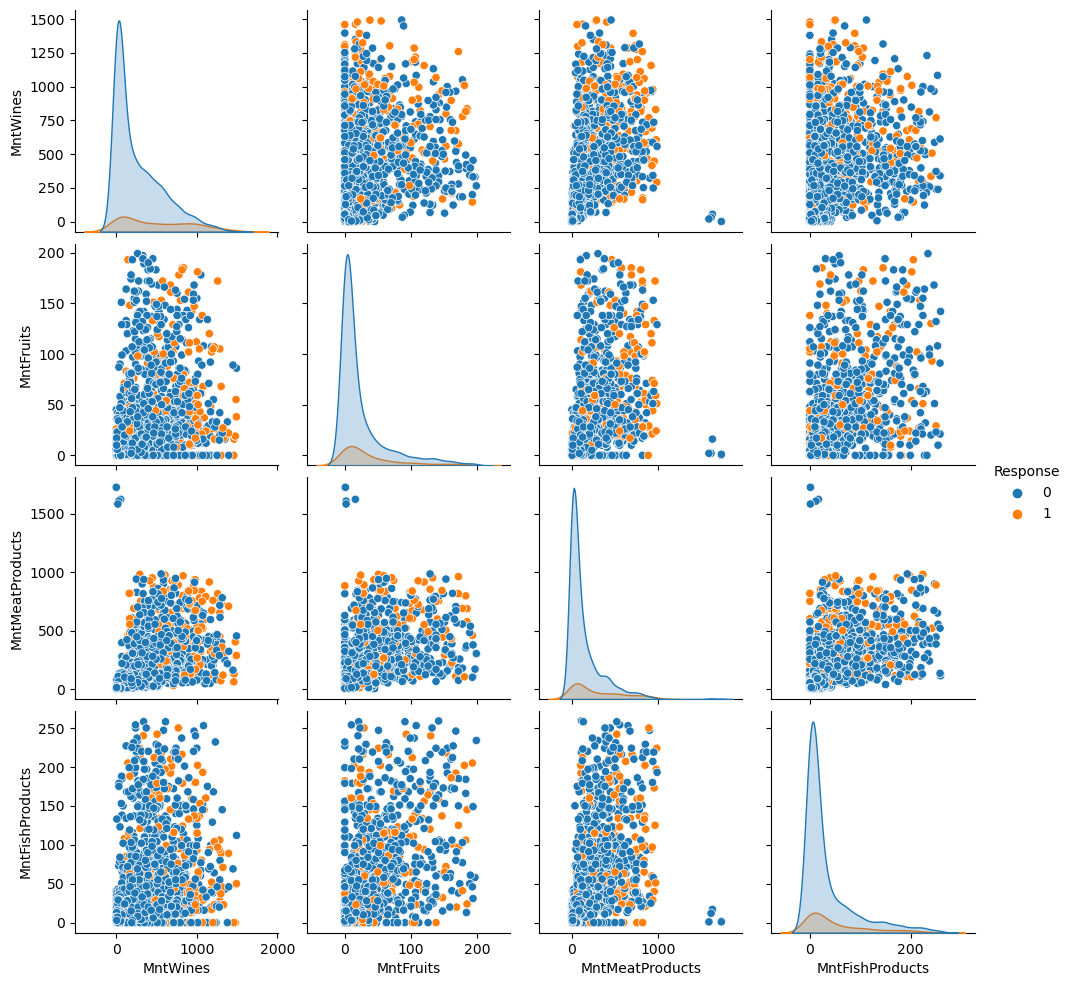

In [21]:
# Multivariate Analysis

purchase_columns_1 = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'Response'
]

# Create a new DataFrame with the selected columns
purchase_df = sale[purchase_columns_1]

# Visualize the pair plot
sns.pairplot(purchase_df, hue='Response')
plt.show()

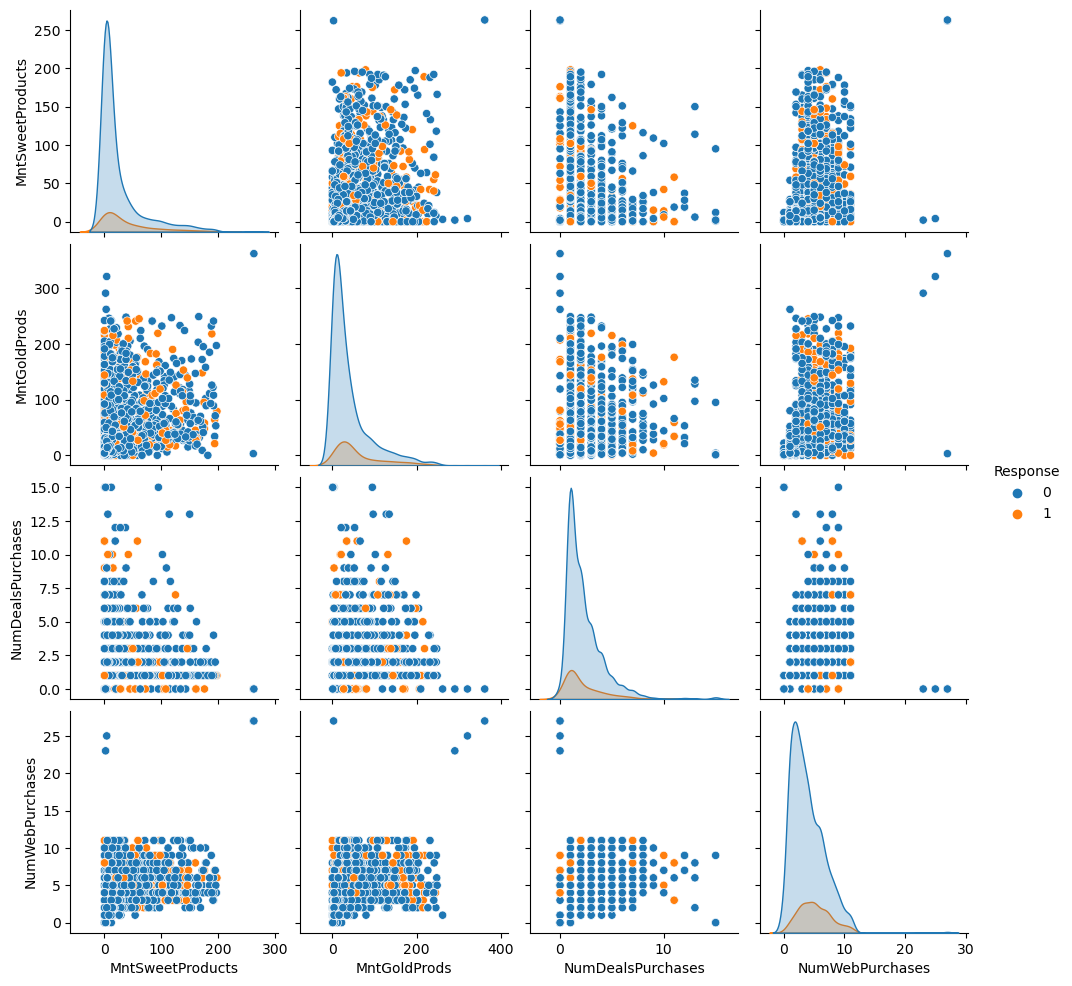

In [22]:
# Multivariate Analysis

purchase_columns_2 = [
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'Response'
]

# Create a new DataFrame with the selected columns
purchase_2_df = sale[purchase_columns_2]

# Visualize the pair plot
sns.pairplot(purchase_2_df, hue='Response')
plt.show()

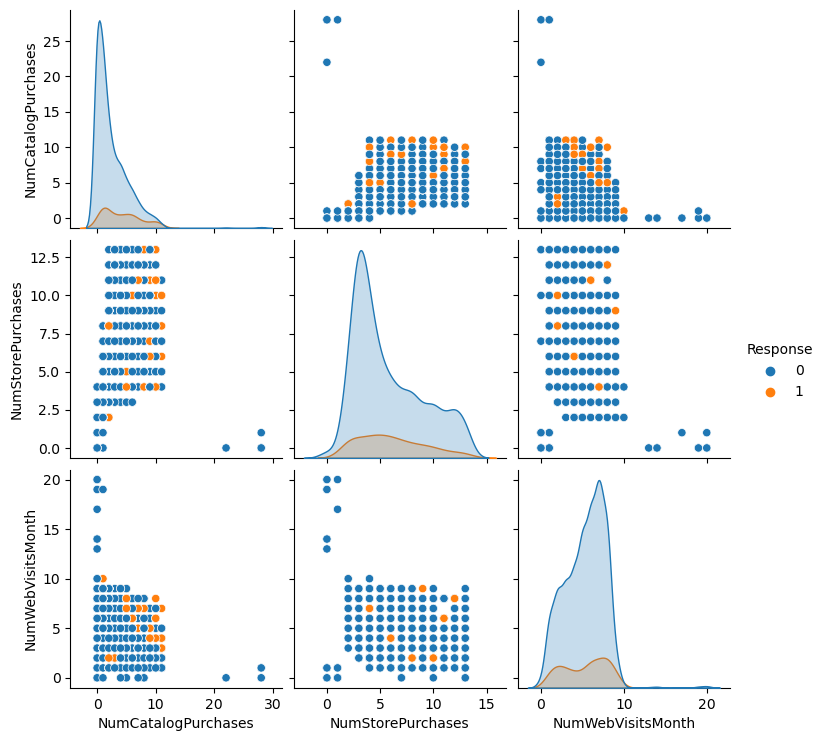

In [23]:
# Multivariate Analysis

purchase_columns_3 = [
    'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'Response'
]

# Create a new DataFrame with the selected columns
purchase_3_df = sale[purchase_columns_3]

# Visualize the pair plot
sns.pairplot(purchase_3_df, hue='Response')
plt.show()

# Business Analysis and Hypothesis (Task 2)


1. Generate and check hypothesis around Amount Spent on different categories and 
response rate in different marketing campaigns.

In [28]:
# Calculate total spending across categories
sale['TotalSpending'] = sale[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Hypotheses testing
# H1 - Customers spending more on wine (MntWines) have higher acceptance rates
wine_accepted = sale[sale['MntWines'] > 200]['AcceptedCmp1'].mean()
print("Hypothesis 1 (Wine): Acceptance rate for high wine spenders:",wine_accepted)

# H7 - Acceptance rate in the third campaign (AcceptedCmp3)
campaign3_accepted = sale['AcceptedCmp3'].mean()
print(f"Hypothesis 7 (Campaign 3): Acceptance rate in the third campaign:", campaign3_accepted)


Hypothesis 1 (Wine): Acceptance rate for high wine spenders: 0.1271186440677966
Hypothesis 7 (Campaign 3): Acceptance rate in the third campaign: 0.07276785714285715


In [25]:
Hypotheses:
Hypothesis 1 (H1): Customers who spend more on wine (MntWines) are more likely to respond positively to marketing campaigns.
Hypothesis 2 (H2): Higher spending on fruits (MntFruits) correlates with better campaign acceptance rates.
Hypothesis 3 (H3): Increased spending on meat products (MntMeatProducts) positively influences campaign response.
Hypothesis 4 (H4): Customers who spend more on fish products (MntFishProducts) are more receptive to marketing.
Hypothesis 5 (H5): Spending on sweets (MntSweetProducts) is associated with higher campaign acceptance.
Hypothesis 6 (H6): Gold product spending (MntGoldProducts) impacts campaign response rates.
Response Rates in Different Marketing Campaigns:
We’ll analyze the impact of campaign-specific factors on customer acceptance rates.
Hypotheses:
Hypothesis 7 (H7): The third campaign (AcceptedCmp3) has a higher acceptance rate compared to other campaigns.
Hypothesis 8 (H8): The fourth campaign (AcceptedCmp4) shows a positive effect on customer response.
Hypothesis 9 (H9): The fifth campaign (AcceptedCmp5) has a significant impact on acceptance.
Hypothesis 10 (H10): The first campaign (AcceptedCmp1) influences customer behavior.
Hypothesis 11 (H11): The second campaign (AcceptedCmp2) plays a role in campaign success.

SyntaxError: invalid character '’' (U+2019) (2162641646.py, line 9)

In [30]:
# Hypotheses testing
hypotheses = {
    'H1 (Wine)': sale[sale['MntWines'] > 200]['AcceptedCmp1'].mean(),
    'H2 (Fruits)':sale[sale['MntFruits'] > 60]['AcceptedCmp1'].mean(),
    'H3 (Meat)': sale[sale['MntMeatProducts'] > 100]['AcceptedCmp1'].mean(),
    'H4 (Fish)': sale[sale['MntFishProducts'] > 30]['AcceptedCmp1'].mean(),
    'H5 (Sweets)': sale[sale['MntSweetProducts'] > 70]['AcceptedCmp1'].mean(),
    'H6 (Gold)': sale[sale['MntGoldProds'] > 10]['AcceptedCmp1'].mean(),
    'H7 (Campaign 3)': sale['AcceptedCmp3'].mean(),
    'H8 (Campaign 4)': sale['AcceptedCmp4'].mean(),
    'H9 (Campaign 5)': sale['AcceptedCmp5'].mean(),
    'H10 (Campaign 1)': sale['AcceptedCmp1'].mean(),
    'H11 (Campaign 2)': sale['AcceptedCmp2'].mean()
}

for hypothesis, acceptance_rate in hypotheses.items():
    print(f"{hypothesis}: Acceptance rate: {acceptance_rate:.2f}")

# You can further analyze other hypotheses or perform statistical tests as needed


H1 (Wine): Acceptance rate: 0.13
H2 (Fruits): Acceptance rate: 0.14
H3 (Meat): Acceptance rate: 0.14
H4 (Fish): Acceptance rate: 0.15
H5 (Sweets): Acceptance rate: 0.18
H6 (Gold): Acceptance rate: 0.08
H7 (Campaign 3): Acceptance rate: 0.07
H8 (Campaign 4): Acceptance rate: 0.07
H9 (Campaign 5): Acceptance rate: 0.07
H10 (Campaign 1): Acceptance rate: 0.06
H11 (Campaign 2): Acceptance rate: 0.01


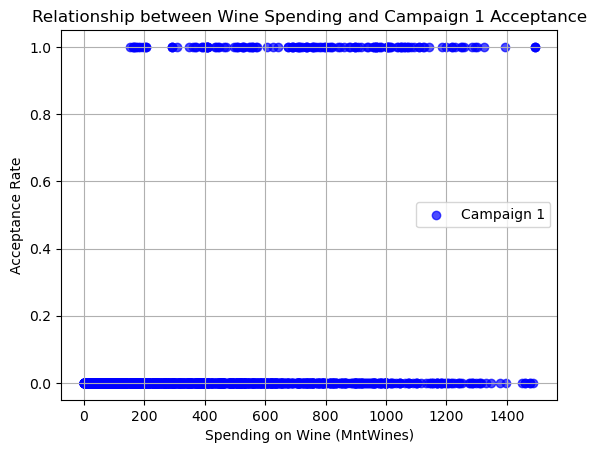

In [32]:
# # Scatter plot for wine spending vs. Campaign 1 acceptance

spending = sale['MntWines']  # Wine spending
acceptance = sale['AcceptedCmp1']  # Campaign 1 acceptance

plt.scatter(spending, acceptance, alpha=0.7, color='b', label='Campaign 1')
plt.xlabel('Spending on Wine (MntWines)')
plt.ylabel('Acceptance Rate')
plt.title('Relationship between Wine Spending and Campaign 1 Acceptance')
plt.legend()
plt.grid(True)
plt.show()


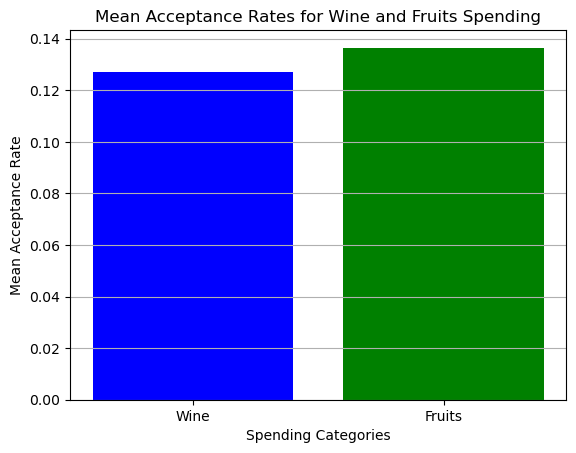

In [33]:
# Calculate mean acceptance rates for different spending categories
mean_acceptance_wine = sale[sale['MntWines'] > 200]['AcceptedCmp1'].mean()
mean_acceptance_fruits = sale[sale['MntFruits'] > 60]['AcceptedCmp1'].mean()

# Create a bar plot
categories = ['Wine', 'Fruits']
mean_acceptance = [mean_acceptance_wine, mean_acceptance_fruits]

plt.bar(categories, mean_acceptance, color=['b', 'g'])
plt.xlabel('Spending Categories')
plt.ylabel('Mean Acceptance Rate')
plt.title('Mean Acceptance Rates for Wine and Fruits Spending')
plt.grid(axis='y')
plt.show()


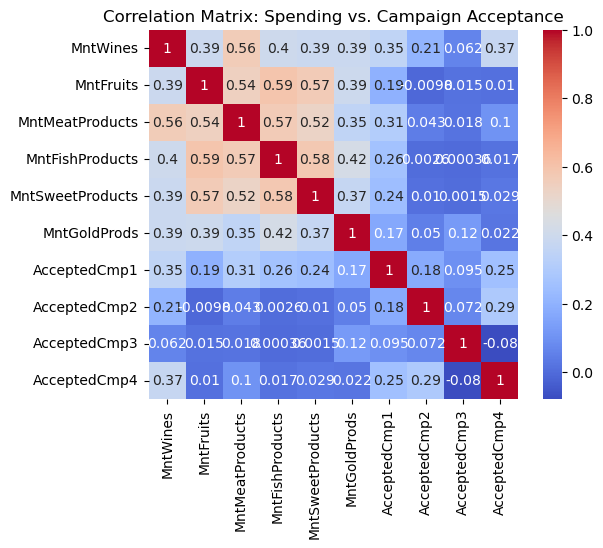

In [52]:
# correlation matrix
corr_matrix = sale[['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4']].corr()

# heatmap

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix: Spending vs. Campaign Acceptance')
plt.show()


2. Create a funnel analysis showing what percentage of unique customers accept 
campaign 1,2, 3,..etc

In [63]:
import plotly.express as px

# Calculate total spending across categories (you can customize this)
sale['TotalSpending'] = sale[['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

# Calculate acceptance rates for each campaign
campaigns = ['AcceptedCmp4', 'AcceptedCmp3', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']  # Add other campaigns
acceptance_rates = [(sale[campaign].sum() / len(sale)) * 100 for campaign in campaigns]

# Create a funnel plot
fig = px.funnel(x=acceptance_rates, y=campaigns)
fig.show()


3. Find out how income impacts the amount spent on - Wine - Meat Products - Gold 
Products - Fish Products

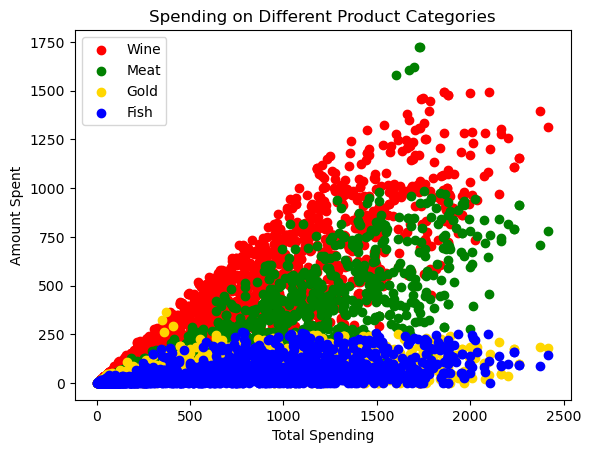

In [65]:
# Calculate total spending across categories
sale['TotalSpending'] = sale[['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts']].sum(axis=1)

# Scatter plot: Spending vs. Total Spending
plt.scatter(sale['TotalSpending'], sale['MntWines'], label='Wine', color='red')
plt.scatter(sale['TotalSpending'], sale['MntMeatProducts'], label='Meat', color='green')
plt.scatter(sale['TotalSpending'], sale['MntGoldProds'], label='Gold', color='gold')
plt.scatter(sale['TotalSpending'], sale['MntFishProducts'], label='Fish', color='blue')
plt.xlabel('Total Spending')
plt.ylabel('Amount Spent')
plt.title('Spending on Different Product Categories')
plt.legend()
plt.show()


In [ ]:
'''scatter plot that shows the relationship between total spending and spending on different product categories 
(wine, meat, gold, and fish). Here are some observations:


1. Wine Spending (Red Points):
We see a scattered distribution of red points (representing wine spending).
There’s no clear linear trend between total spending and wine spending.
Some customers spend more on wine, while others spend less, regardless of their total spending.

2. Meat Products Spending (Green Points):
The green points (representing meat products spending) also show variability.
Similar to wine, there’s no strong linear correlation between total spending and meat products spending.
Some customers allocate more budget for meat, while others spend less.

3. Gold Products Spending (Gold Points):
The gold points (representing gold products spending) exhibit a different pattern.
While there’s still variability, we notice that most gold spending occurs at lower total spending levels.
This suggests that customers with varying total spending budgets invest in gold products.

4. Fish Products Spending (Blue Points):
The blue points (representing fish products spending) show a similar trend.
Fish spending is spread across different total spending levels.
Some customers prioritize fish products regardless of their overall spending capacity.


Overall Implications:

Income likely plays a significant role in determining spending patterns.
High-income individuals may allocate more budget for premium items like wine and meat.
Gold spending appears less influenced by total spending, possibly due to cultural or investment factors.
Fish spending is relatively consistent across different income levels.


'''

4. Can you test the hypothesis that recent customers complain less in general 
compared to older customers?

In [103]:
from scipy.stats import chi2_contingency

# Categorize customers as recent or older
sale['CustomerGroup'] = np.where(sale['Complain'].count(), 'Recent', 'Older')

# Create a contingency table
contingency_table = pd.crosstab(sale['CustomerGroup'], sale['Complain'])

# Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Significance level (alpha)
alpha = 0.05

# Interpret the p-value
if p < alpha:
    print(f"Hypothesis rejected: Recent customers complain differently from older customers (p-value = {p:.4f})")
else:
    print(f"Hypothesis not rejected: No significant difference in complaints (p-value = {p:.4f})")


Hypothesis not rejected: No significant difference in complaints (p-value = 1.0000)


5. Do people who accept the offer in the first campaign also accept in any other 
campaign?


In [101]:
# Check if customers accepted in Campaign 1 also accepted in any other campaigns
for campaign in range(1, 6):
    campaign_col = f'AcceptedCmp{campaign}'
    accepted_both = sale[(sale['AcceptedCmp1'] == 1) & (sale[campaign_col] == 1)]
    print(f"Customers who accepted in Campaign 1 and also in Campaign {campaign}:")
    print(accepted_both['ID'].tolist())
    print(f"Total count: {len(accepted_both)}\n")


Customers who accepted in Campaign 1 and also in Campaign 1:
[5794, 7962, 3725, 7030, 1524, 1992, 1772, 4452, 6815, 1945, 7233, 830, 10089, 8545, 3005, 7872, 10949, 9529, 10150, 7381, 5067, 9493, 10133, 6072, 5718, 4673, 9369, 3711, 3667, 10430, 6892, 5758, 2114, 4261, 2535, 2829, 1592, 4310, 8492, 9855, 9984, 7627, 5453, 8029, 2574, 8746, 1277, 2186, 7832, 3762, 5236, 477, 569, 6421, 2612, 4216, 3334, 4426, 10489, 4611, 4530, 4856, 8722, 10767, 2176, 9121, 1340, 4646, 6935, 9274, 4947, 1204, 7875, 4580, 1215, 8143, 10556, 1399, 2225, 6583, 3433, 2798, 2781, 5529, 4001, 1139, 737, 7734, 10446, 10701, 8537, 3174, 5536, 6086, 1763, 5386, 6024, 7313, 9606, 3919, 9058, 2863, 10513, 2437, 7215, 2886, 1553, 1172, 8093, 10965, 6906, 4637, 4122, 2894, 3483, 146, 5538, 3910, 500, 10314, 9010, 1509, 8931, 5278, 988, 9349, 1627, 3138, 4998, 7321, 6049, 3010, 1137, 2975, 10394, 2147, 6565, 2008, 5831, 3520, 4789, 2931, 8439, 2415]
Total count: 144

Customers who accepted in Campaign 1 and also in 

6. Profile of people who respond vs. who don’t.
